In [1]:
%matplotlib inline


# Visualization of MLP weights on MNIST

This code is originally from https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py

Sometimes looking at the learned coefficients of a neural network can provide
insight into the learning behavior. For example if weights look unstructured,
maybe some were not used at all, or if very large coefficients exist, maybe
regularization was too low or the learning rate too high.

This example shows how to plot some of the first layer weights in a
MLPClassifier trained on the MNIST dataset.

To make the example run faster, we use very few hidden units, and train only
for a very short time. Training longer would result in weights with a much
smoother spatial appearance. The example will throw a warning because it
doesn't converge, in this case this is what we want because of CI's time
constraints.


In [2]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

# Load data from https://www.openml.org/d/554
# mnist dataset is handwriting images
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
X = X / 255.0


The input data consists of 28x28 pixel handwritten digits, leading to 784 features in the dataset. Therefore the first layer weight matrix have the shape (784, hidden_layer_sizes[0]).  We can therefore visualize a single column of the weight matrix as a 28x28 pixel image.

In [17]:
print(X[:5])
# print((X.values[0]))
print(X.head())
print(y[:5])

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       

In [7]:
# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=10,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)

# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    # train the model with training dataset
    mlp.fit(X_train, y_train)



Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


Let's see the results and a single column of the weight matrix as a 28x28 pixel image.

Training set score: 0.986800
Test set score: 0.970000


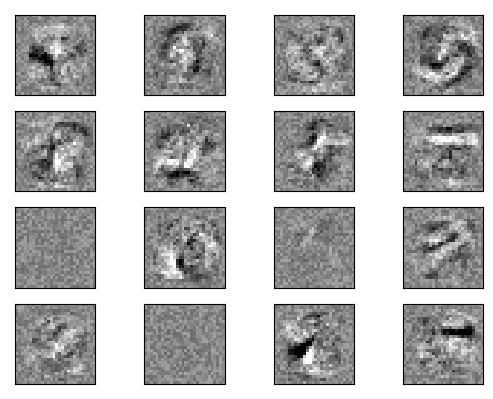

In [8]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [9]:
mlp.coefs_[0].shape

(784, 50)